In [1]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import fits

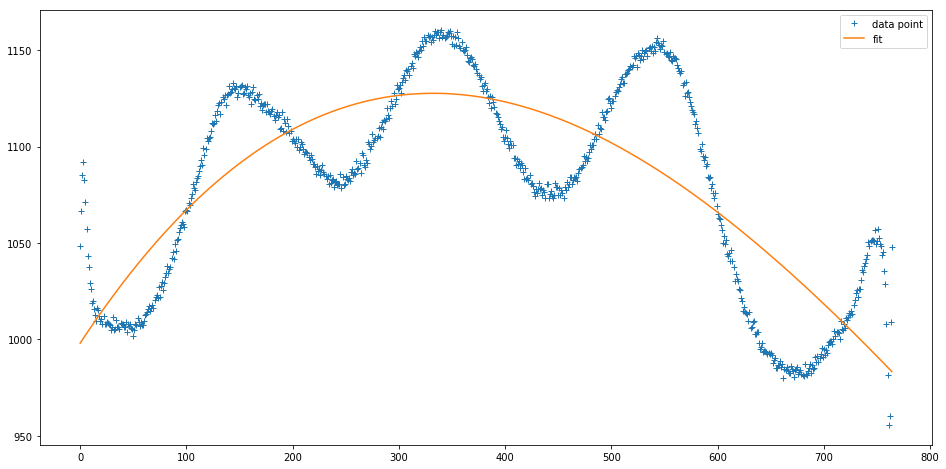

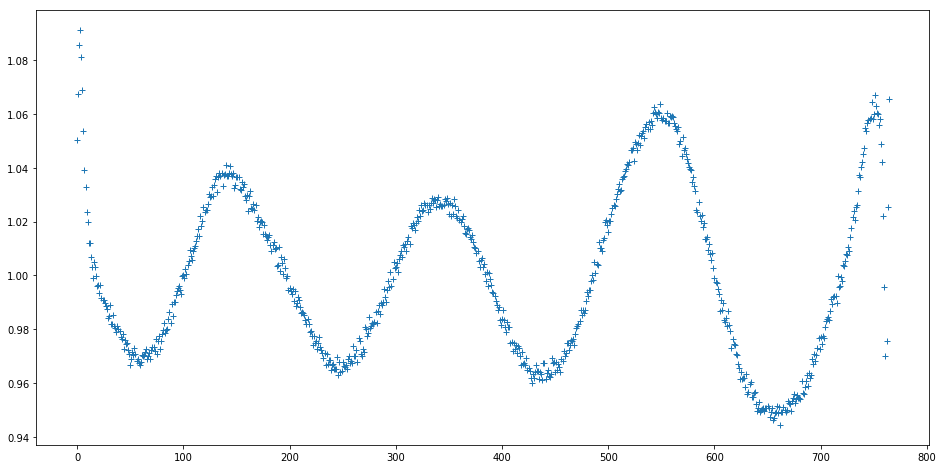

In [2]:
#30s darks
dark30s_1=fits.open('../new_data/30s_dark.00000008.DARK.FIT')[0].data
dark30s_2=fits.open('../new_data/30s_dark.00000009.DARK.FIT')[0].data
dark30s_3=fits.open('../new_data/30s_dark.00000010.DARK.FIT')[0].data
m_dark30s=(dark30s_1+dark30s_2+dark30s_3)/3

#30s flat
flatnames=['30s_flat.00000003.FLAT.FIT','30s_flat.00000005.FLAT.FIT','30s_flat.00000006.FLAT.FIT','30s_flat.00000007.FLAT.FIT']
flat1=fits.open('../new_data/30s_flat.00000003.FLAT.FIT')[0].data
flat2=fits.open('../new_data/30s_flat.00000005.FLAT.FIT')[0].data
flat3=fits.open('../new_data/30s_flat.00000006.FLAT.FIT')[0].data
flat4=fits.open('../new_data/30s_flat.00000007.FLAT.FIT')[0].data
flatdata=[flat1,flat2,flat3,flat4]
m_flat=sum(flatdata)/4-m_dark30s

#cut the slit
m_flatcut=m_flat[28:89,:]
##fits.PrimaryHDU(m_flat).writeto('../new_data/m_flat.fits')
##fits.PrimaryHDU(m_flatcut).writeto('../new_data/m_flatcut.fits')
avgflat=np.mean(m_flatcut,axis=0)
pix_pos=np.array([i for i in range(765)])
plt.figure(figsize=(16,8))
plt.plot(pix_pos,avgflat,'+',label='data point')
fit=np.poly1d(np.polyfit(pix_pos,avgflat,3))
plt.plot(pix_pos,fit(pix_pos),label='fit')
plt.legend()

normflat=avgflat/fit(pix_pos)
plt.figure(figsize=(16,8))
plt.plot(pix_pos,normflat,'+')


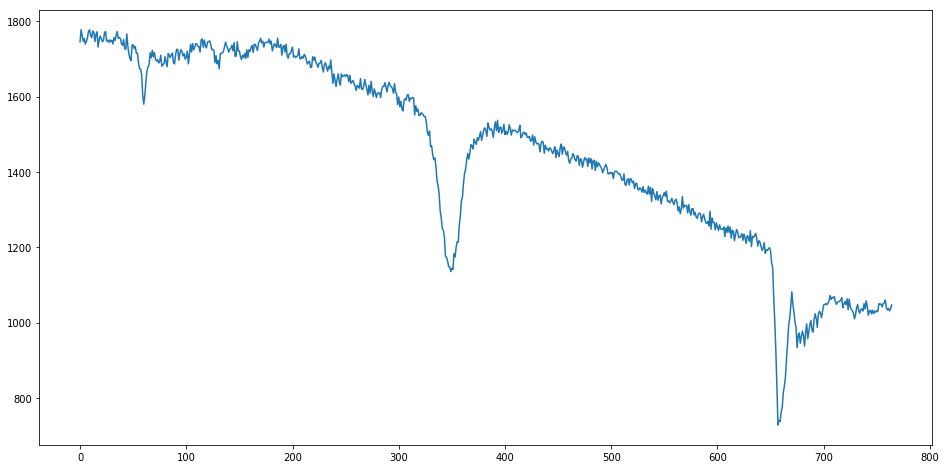

In [3]:
#2min dark
dark2m_1=fits.open('../new_data/2min_dark.00000000.DARK.FIT')[0].data
dark2m_2=fits.open('../new_data/2min_dark.00000001.DARK.FIT')[0].data
m_dark2m=(dark2m_1+dark2m_2)/2

#getting ref star spec-indices range[75:89]
refstar=fits.open('../new_data/lamper_spec_2min_new.00000000.FIT')[0].data
refstarcut=(refstar-m_dark2m)[75:89,:]
refstar_spec=np.mean(refstarcut,axis=0)/normflat
plt.figure(figsize=(16,8))
plt.plot(pix_pos,refstar_spec)


In [4]:
#getting the galaxy spec with the same wl setting as the refstar 
ngc891_2=fits.open('../new_data/ngc_bulge_2.00000003.FIT')[0].data